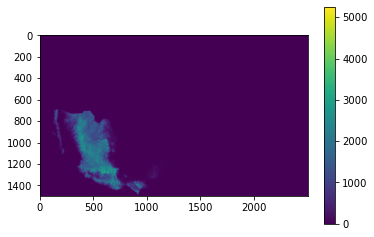

In [15]:
import h5py
import netCDF4
import matplotlib.pyplot as plt

PATH_DATOS_ALTURA = "Recursos/altura_CONUS_1500_2500.h5"
PATH_NC           = "Recursos/Banda13_Prueba.nc"

nc = netCDF4.Dataset(PATH_NC)

with h5py.File(PATH_DATOS_ALTURA,"r") as datos:
    array_altura = datos["Altura"][()]
    
plt.imshow(array_altura)
plt.colorbar()

### Obtenemos la altura de un lugar

El array de los datos de altura están en la misma posición espacial que las imágenes satélitales por lo que podemos usar las herramientas desarrolladas en la librería libGOES para su manejo.

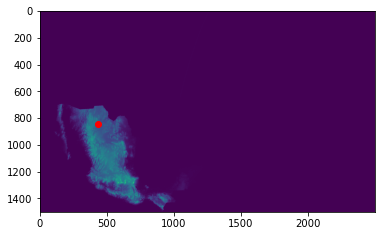

In [16]:
import lib.libGOES as GOES
import numpy as np

latitud , longitud = 28.61,-106.01
X = np.array(nc.variables["x"])
Y = np.array(nc.variables["y"])
lambda_o = nc.variables["goes_imager_projection"].longitude_of_projection_origin
nc.close()
nc = (X,Y,lambda_o)

px_x , px_y = GOES.coordinates2px_GOES(nc,latitud=latitud,longitud=longitud)

plt.imshow(array_altura)
plt.scatter(px_x,px_y,c="red")

In [17]:
array_altura[px_y,px_x]

1426